In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d

In [2]:
data = pd.read_csv('../data/b1c0_cycling_data.csv')
cycles = data.groupby('Cycle_Index')
cycle_dict = {}

for i in cycles:
    cycle_dict[i[0]] = i[1]

In [3]:
discharge_100 = cycle_dict[100][cycle_dict[100]['I'] < 0][
    cycle_dict[100][cycle_dict[100]['I'] < 0]['I'] < cycle_dict[100][cycle_dict[100]['I'] < 0]['I'].mean()*1.2]
discharge_10 = cycle_dict[10][cycle_dict[10]['I'] < 10][
    cycle_dict[10][cycle_dict[10]['I'] < 10]['I'] < cycle_dict[10][cycle_dict[10]['I'] < 0]['I'].mean()*1.2]

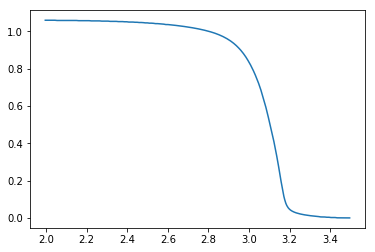

In [5]:
plt.plot(discharge_10['V'], discharge_10['Qd'])

In [12]:
discharge_10['V'].min()

1.9957494999999998

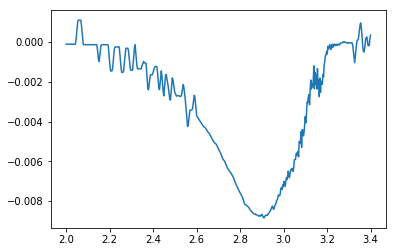

In [50]:
v_low = 2
v_high = 3.4
npoint = 500

x_common = np.linspace(v_low, v_high, num=npoint, endpoint=True)

f10 = interp1d(discharge_10['V'], discharge_10['Qd'])
f100 = interp1d(discharge_100['V'], discharge_100['Qd'])
dy_common = f100(x_common) - f10(x_common)
plt.plot(x_common, dy_common)

In [51]:
from math import log
from math import sqrt

# Minimum
print('Minimum of dQ:',log(abs(min(dy_common))))

# Mean
#lets find the close to 0 points, eg. 1/10 of max
npoint2=sum(dy_common<(min(dy_common))/20)

#print(npoint2)
dq_mean = sum(dy_common)/npoint2     ##
print('Average dQ between XXX : ', log(abs(dq_mean)))

dq_min = min(dy_common)              ##

dy_difference = dy_common-dq_mean

# Variance
V = sum(dy_difference**2)/(npoint2-1)
V = log(abs(V))
print('Variance:', V)

# Skewness

S = sum(dy_difference**3)/npoint2/(sqrt(sum(dy_difference**2))**3)
S = log(abs(S))
print('Skewness:', S)

# Kurtosis
 
K = sum((dy_difference**4)/npoint2/(sum(dy_difference**2)/npoint2)**2)    
K = log(abs(K))
print('Kurtosis:',K)

Minimum of dQ: -4.728051319591058
Average dQ between XXX :  -5.440362997224609
Variance: -11.095990496178082
Skewness: -9.51953112934698
Kurtosis: 0.03526441041931454


In [1]:
import pandas as pd

data = pd.read_csv('../data/b1c0_cycling_data.csv')

In [2]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

def discharge_curve_prep(data, higher_cycle):
    cycles = data.groupby('Cycle_Index')
    cycle_dict = {}

    for i in cycles:
        cycle_dict[i[0]] = i[1]
    
    dc_higher = cycle_dict[higher_cycle][cycle_dict[higher_cycle]['I'] < 0][
        cycle_dict[higher_cycle][cycle_dict[higher_cycle]['I'] < 0]['I'] < cycle_dict[higher_cycle][cycle_dict[higher_cycle]['I'] < 0]['I'].mean()]
    dc10 = cycle_dict[10][cycle_dict[10]['I'] < 10][
        cycle_dict[10][cycle_dict[10]['I'] < 10]['I'] < cycle_dict[10][cycle_dict[10]['I'] < 0]['I'].mean()]
    
    return(dc10, dc_higher)

def q_finder(dc10, dc_higher):
    v_low = 2.01
    v_high = 3.4
    npoint = 500

    x_common = np.linspace(v_low, v_high, num=npoint, endpoint=True)

    f10 = interp1d(dc10['V'], dc10['Qd'])
    f_higher = interp1d(dc_higher['V'], dc_higher['Qd'])
    dy_common = f_higher(x_common) - f10(x_common)
    
    return x_common, dy_common

def extract_q_features(V, Q):
    from math import log
    from math import sqrt
    import numpy as np

    # Minimum
    qmin = log(abs(min(Q)))

    # Mean
    qmean = log(abs(Q.mean()))
    
    # Variance
    Q_diff = Q - qmean
    Q_diff_sq_sum = sum((Q_diff)**2)    
    variance = log(abs(Q_diff_sq_sum/(len(Q)-1)))

    # Skewness

    s = sum(Q_diff**3)/(len(Q)-1)/(sqrt(sum(Q_diff**2))**3)
    skewness = log(abs(s))

    # Kurtosis

    k = sum((Q_diff**4)/(len(Q)-1)/(sum(Q_diff**2)/(len(Q)-1))**2)    
    kurtosis = log(abs(k))
    
    # Value at 2 V
    
    index = int(np.argwhere(np.isclose(V, 2.01))[0][0])
    value_at_2_v = log(abs(Q[index]))
    
    return(qmin, qmean, variance, skewness, kurtosis, value_at_2_v)

def q_parameter_wrapped(data, cycle):
    """
    Wrapper function that looks at the comparison between Cycle 100 and Cycle 10 of any given cell and returns 
    the six parameters that are related to the dQ curve.
    """
    discharge_10, discharge_higher = discharge_curve_prep(data,higher_cycle=cycle)
    V, Q = q_finder(discharge_10, discharge_higher)
    qmin, qmean, qvariance, dskewness, qkurtosis, value_at_2_v= extract_q_features(V, Q)
    
    return (qmin, qmean, qvariance, dskewness, qkurtosis, value_at_2_v)

In [3]:
q_parameter_wrapped(data, 59)

(-6.604346393518359,
 -6.755709596401647,
 3.8231227411765434,
 -9.319910023927505,
 -0.0020016798559661804,
 -6.449950757193372)

In [70]:
discharge_10, discharge_100 = discharge_curve_prep('b1c0_cycling_data.csv')

AttributeError: 'str' object has no attribute 'groupby'

In [46]:
V, Q = q_finder(discharge_10, discharge_100)

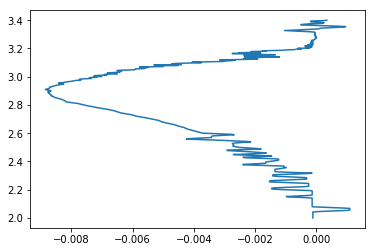

In [47]:
plt.plot(Q, V)

In [48]:
a, b, c, d, e = extract_q_features(Q)

In [49]:
print(a, b, c, d ,e)

-4.728051319591058 -5.788503038713505 3.512691270615444 -8.97377170042061 0.34413711796370805
